# Feature Detection techniquesin Image Processing:

Edge detection is a technique of image processing used to identify points in a digital image with discontinuities, simply to say, sharp changes in the image brightness. These points where the image brightness varies sharply are called the edges (or boundaries) of the image.

## Edge Detection:

### Canny:

To detect the edges we use the most significant method called **Canny Edge Detector.**

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in  images.        

Canny Edge detection is composed of 5 steps:       

1. **Noise reduction** - to reduce noise from the image                            
2. **Gradient calculation** - to get the smoothened edges using gradient with respect to Sobel filter which is bit messy.                     
3. **Non-maximum suppression** - to get the edges from smoothening to thinning                       
4. **Double threshold** - to set the threshold by dividing into strong, weak , non-relevant pixels for the edges. used for                               getting perfect edges but with some noise                         
5. **Edge Tracking by Hysteresis** -  the hysteresis consists of transforming weak pixels into strong ones, if and only if at                                         least one of the pixels around the one being processed is a strong one               

One last important thing to mention, is that the algorithm is based on grayscale pictures. Therefore, the pre-requisite is to **convert the image to grayscale**



Links: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123          
      https://www.youtube.com/watch?v=sRFM5IEqR2w

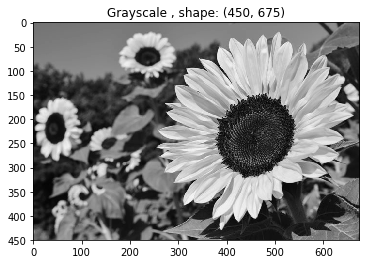

In [27]:
# importing library
import cv2
import matplotlib.pyplot as plt

# reading an image and converting it to grayscale using 0
image= cv2.imread("./data/sunflower.jpg", 0)

#plotting the image
plt.title("Grayscale , shape: {}".format(image.shape))
plt.imshow(image, cmap= "gray")
plt.show()

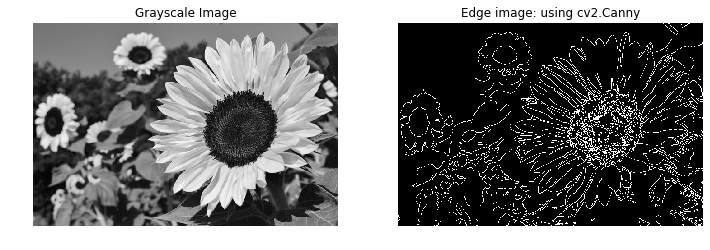

In [28]:
# Using Canny Edge Detector , cv2.Canny

# threshold1= first threshold for the hysteresis procedure.
# threshold2= second threshold for the hysteresis procedure.
# apertureSize= aperture/kernel size for the Sobel operator.
edge_image= cv2.Canny(image= image, threshold1= 100, threshold2= 200, apertureSize= 3)

#plotting the images
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Grayscale Image")
ax1.axis("off")
ax1.imshow(image,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Edge image: using cv2.Canny")
ax2.axis("off")
ax2.imshow(edge_image,cmap= "gray")
plt.show()

## Corner Detection:

### cornerHarris: 
The idea is to locate interest points where the surrounding neighbourhood shows edges in more than one direction. The basic idea of algorithm is to find the difference in intensity for a displacement of (u,v) in all directions

Harris corner detector is composed of 5 steps:                   

1. **Color image to Grayscale conversion** - Take the grayscale of the original image                       
2. **Spatial derivative calculation** -  Apply a Gaussian filter to smooth out any noise and Apply Sobel operator to find the x and                                      y gradient values for every pixel in the grayscale image                  
3. **Structure tensor setup** - For each pixel p in the grayscale image, consider a 3×3 window around it and compute the corner                                 strength function. Call this its Harris value.                
4. **Harris response calculation** - Find all pixels that exceed a certain threshold and are the local maxima within a certain                                      window (to prevent redundant dupes of features)                   
5. **Find edges and corners using R** - For each pixel that meets the criteria in step 4, compute a feature descriptor.          
   Edge : **r < 0**             
   Corner : **r > 0**              
   Flat: **r = 0**         

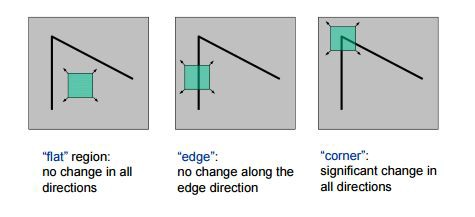               

Links: https://medium.com/data-breach/introduction-to-harris-corner-detector-32a88850b3f6           
https://muthu.co/harris-corner-detector-implementation-in-python/

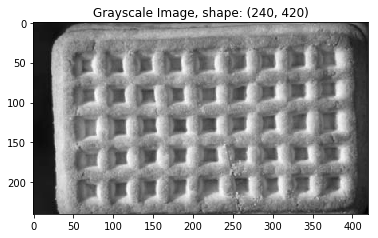

In [25]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image and convert into grayscale by using 0
biscuit_img_bgr= cv2.imread("./data/biscuit.jpg")

# convert from bgr to rgb
biscuit_img_rgb= cv2.cvtColor(biscuit_img_bgr, cv2.COLOR_BGR2RGB)

# slicing the image
biscuit_img_rgb= biscuit_img_rgb[60:300,400:820]

# convert to grayscale
biscuit_img= cv2.cvtColor(biscuit_img_rgb, cv2.COLOR_RGB2GRAY)

# plotting the image
plt.title("Grayscale Image, shape: {}".format(biscuit_img.shape))
plt.imshow(biscuit_img,cmap= "gray")
plt.show()

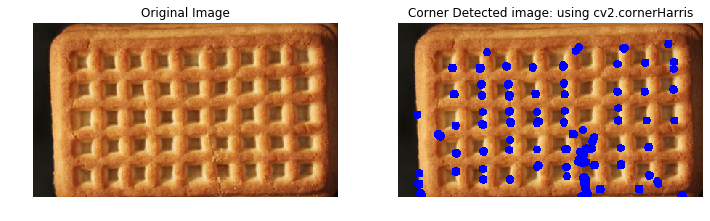

In [26]:
# using Harris corner detector, cv2.cornerHarris

# blockSize= Neighborhood size
# ksize= Aperture parameter for the Sobel operator.
# k= Harris detector free parameter.
detect_corners= cv2.cornerHarris(src= biscuit_img, blockSize= 2, ksize= 3, k= 0.02)

# dilate the points to enhance the corners
kernel= np.ones(shape= (5,5), dtype= np.uint8)
dst= cv2.dilate(detect_corners, kernel= kernel, iterations= 1)

# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(biscuit_img_rgb)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle(img= corner_image, center= (i, j), radius= 3, color= (0,0,255), thickness= -1)

#plt.imshow(corner_image)


#plotting the images
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(biscuit_img_rgb,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Corner Detected image: using cv2.cornerHarris")
ax2.axis("off")
ax2.imshow(corner_image,cmap= "gray")
plt.show()

### cornerMinEigenVal:
Calculates eigenvalues and eigenvectors of image blocks for corner detection.        

* the derivatives are computed using the Sobel operator.            
* it finds eigenvectors and eigenvalues of M and stores them in the destination image        
* The output of the function can be used for robust edge or corner detection.

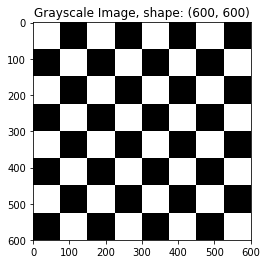

In [131]:
# import library
import cv2
import matplotlib.pyplot as plt

# reading image
# reading an image and convert into grayscale by using 0
chess_img= cv2.imread("./data/chess_board.jpg",0)


# plotting the image
plt.title("Grayscale Image, shape: {}".format(chess_img.shape))
plt.imshow(chess_img,cmap= "gray")
plt.show()

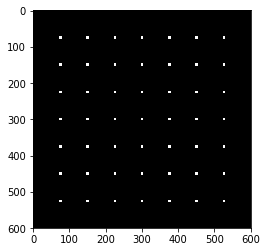

In [132]:
# using cv2.cornerMinEigenVal

minEigenVal= cv2.cornerMinEigenVal(src= chess_img, blockSize= 2, ksize= 3)

# dilating to enhance rthe corners
kernel= np.ones(shape= (5,5), dtype= np.uint8)
dst= cv2.dilate(minEigenVal, kernel= kernel, iterations= 1)

# plotting the image
plt.imshow(dst, cmap= "gray")
plt.show()

### goodFeaturesToTrack:
**Shi-Tomasi Corner Detection Method:**           

- basic intuition is that corners can be detected by looking for significant change in all direction.
- We consider a small window on the image then scan the whole image, looking for corners.
- Shifting this small window in any direction would result in a large change in appearance, if that particular window happens to be located as a corner.               

Shi-Tomasi is almost similar to Harris Corner detector, apart from the way the score (R) is calculated. This gives a better result. Moreover, in this method, we can find the top N corners, which might be useful in case we don’t want to detect each and every corner.

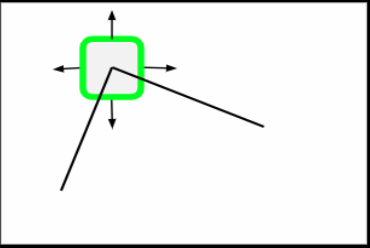

link: https://medium.com/pixel-wise/detect-those-corners-aba0f034078b

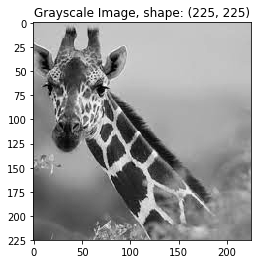

In [76]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image and convert into grayscale by using 0
image= cv2.imread("./data/giraffe.jpg")

# convert from bgr to rgb
image_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# slicing the image
#biscuit_img_rgb= biscuit_img_rgb[60:300,400:820]

# convert to grayscale
image_gray= cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# plotting the image
plt.title("Grayscale Image, shape: {}".format(image_gray.shape))
plt.imshow(image_gray,cmap= "gray")
plt.show()

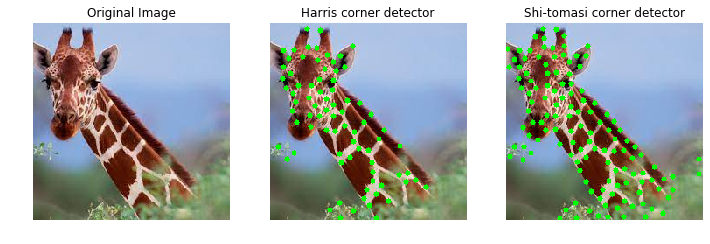

In [77]:
# shi-tomasi corner detection
best_corners_st= cv2.goodFeaturesToTrack(image= image_gray, maxCorners= 1000, qualityLevel= 0.01, minDistance= 10)

# harris Corner Detection
best_corners_h= cv2.goodFeaturesToTrack(image= image_gray, maxCorners= 1000, qualityLevel= 0.01,
                                        minDistance= 10, useHarrisDetector= True, k= 0.04)


def draw_circles(orig_img, corners_coord):
    """drawing circles over the image using corner coordinates"""
    
    # converting to integer
    corners_coord= np.int0(corners_coord)
    
    # copy of the grayscale biscuit image to draw corners over the image
    corners_image= orig_img.copy()
    
    for coord in corners_coord:
        x,y= coord.ravel()
        cv2.circle(corners_image, center= (x,y), radius= 3, color= (0,255,0), thickness= -1)
    
    return corners_image
    

# image using harris detector
draw_harris= draw_circles(image_rgb, best_corners_h)

#image using Shi-tomasi detector
draw_shi_tomasi= draw_circles(image_rgb, best_corners_st)

# plotting the image
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(image_rgb)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Harris corner detector")
ax2.axis("off")
ax2.imshow(draw_harris)


ax2 = fig.add_subplot(1,3,3)
ax2.set_title("Shi-tomasi corner detector")
ax2.axis("off")
ax2.imshow(draw_shi_tomasi)
plt.show()

Shi-Tomasi is a slightly better version after just changing the score formula. We detect corners for several applications : **image alignment, image stitching (remember the panorama feature on your phone camera?), object recognition, 3D reconstruction, motion tracking** and so on.

### preCornerDetect:
Calculates a feature map for corner detection.

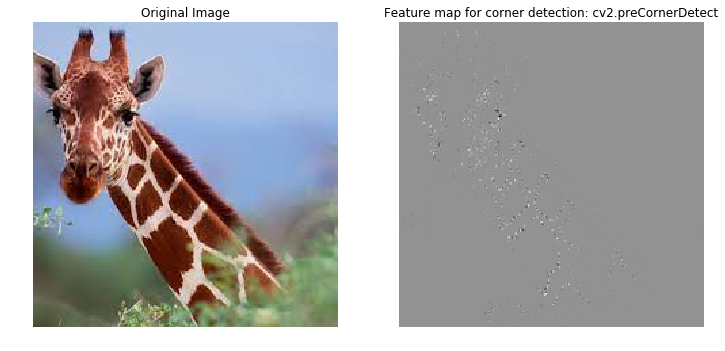

In [187]:
# import library
import cv2
import matplotlib.pyplot as plt

# Read an image
image_bgr= cv2.imread("./data/giraffe.jpg")

# convert to rgb
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# convert to grayscale
image_gray= cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# cv2.preCornerDetect
detect_corner= cv2.preCornerDetect(src= image_gray, ksize= 3)

#plotting the images
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(image_rgb)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Feature map for corner detection: cv2.preCornerDetect")
ax2.axis("off")
ax2.imshow(detect_corner,cmap= "gray")
plt.show()

## Line detection:

### createLineSegmentDetector:
This function is used to detect the line segments from the given image. Lte's try it an see how the results are            

LSD is a linear-time Line Segment Detector giving subpixel accurate results. It is designed to work on any digital image without parameter tuning. It controls its own number of false detections: on average

In [168]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image and convert to grayscale
image_bgr= cv2.imread("./data/boxes.jpg")

# conveting to RGB
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# slicing the image
#image_rgb= image_rgb[60:300,400:820]

# converting to grayscale
image_gray= cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)


# creating class object for linesegment detector
lsd= cv2.createLineSegmentDetector()

lsd

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\lsd.cpp:143: error: (-213:The function/feature is not implemented) Implementation has been removed due original code license issues in function 'cv::LineSegmentDetectorImpl::LineSegmentDetectorImpl'


It shows error as the function is removed in cv2 version: 4.1.1

- Good news! line segment detector is back in **opencv 4.5.4**. Can upgrade and try it.                                  
-  May try to use **cv2.ximgproc.createFastLineDetector()** from contrib module.For those who got errors while calling the function form opencv, you need to have opencv-contrib-python to implement this code, not opencv-python.                       

In [169]:
# creating an object of the function
fld= cv2.ximgproc.createFastLineDetector()

lines= fld.detect(image_gray) #Position 0 of the returned tuple are the detected lines

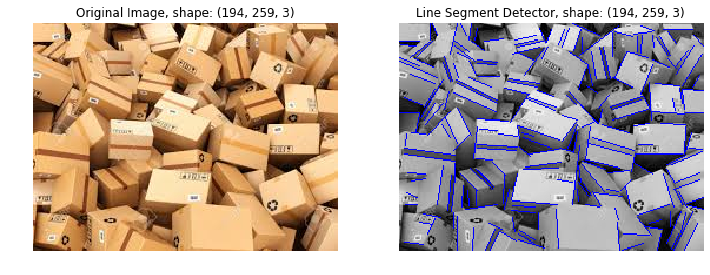

In [170]:
# drawing lines on the object to visualize
result_img= image_rgb.copy()

draw_line= fld.drawSegments(result_img, lines, draw_arrow= False)

# plotting the image
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image, shape: {}".format(image_rgb.shape))
ax1.axis("off")
ax1.imshow(image_rgb)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Line Segment Detector, shape: {}".format(result_img.shape))
ax2.axis("off")
ax2.imshow(draw_line)

plt.show()

### HoughLines:
The Hough transform (HT) can be used to detect lines, circles or other parametric curves.The goal of HoughLines is to find the location of lines in images.

It simply returns an array of (ρ,ϴ) values where ρ is measured in pixels and ϴ is measured in radians

The main advantage of the Hough transform technique is that it is tolerant of gaps in feature boundary descriptions and is relatively unaffected by image noise.

To apply the Houghline method, first an edge detection of the specific image is desirable. 

Links: https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/                  
https://stackoverflow.com/questions/16665742/a-good-approach-for-detecting-lines-in-an-image

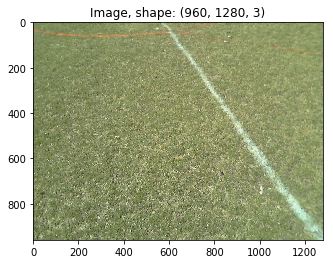

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
image_bgr= cv2.imread("./data/playground.jpg")

# converting to grayscale and also to rgb
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

image_gray= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# plotting the image
plt.title("Image, shape: {}".format(image_rgb.shape))
plt.imshow(image_rgb)
plt.show()

In [3]:
# Edge detection

#first lets perform gaussion blur to extract the edges
blured_img= cv2.GaussianBlur(src= image_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)
ret, thresh= cv2.threshold(src= blured_img, thresh= 180, maxval= 255, type= cv2.THRESH_BINARY)

# erode operation to remove blobs
kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (5,5))
close= cv2.morphologyEx(src= thresh, op= cv2.MORPH_CLOSE, kernel= kernel, iterations= 2)

# Canny
#edge_img = cv2.Canny(thresh,threshold1= 100,threshold2= 200,apertureSize = 3)

# hough lines transform
# This returns an array of r and theta values
lines_hough = cv2.HoughLines(image= close,rho= 1,theta= np.pi/180, threshold= 200)

        

#plt.imshow(edge_img,cmap="gray")

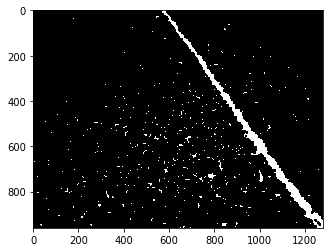

In [4]:
plt.imshow(close,cmap="gray")

In [5]:
lines_hough.shape

(147, 1, 2)

In [6]:
def draw_lines(image, lines):
    
    # mage copy
    result_image= image.copy()
    
    for r,theta in lines[0]:
        # Stores the value of cos(theta) in a
        a = np.cos(theta)
        
        # Stores the value of sin(theta) in b
        b = np.sin(theta)
        
        # x0 stores the value rcos(theta)
        x0 = a*r
        
        # y0 stores the value rsin(theta)
        y0 = b*r
        
        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000*(-b))
        
        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000*(a))
        
        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000*(-b))
        
        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000*(a))
        
        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be #drawn. In this case, it is blue. 
        cv2.line(img= result_image,pt1= (x1,y1),pt2= (x2,y2),color= (0,0,255),thickness= 5)
    return result_image

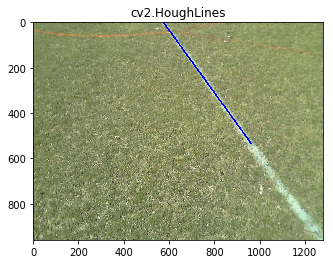

In [7]:
plt.title("cv2.HoughLines")
plt.imshow(draw_lines(image_rgb, lines_hough))
plt.show()

#### HoughLinesP:
Finds line segments in a binary image using the probabilistic Hough transform.              
Function accepts single channel as input.

Two additional parameters added from houghlines:

**minLineLength**- Minimum line length. Line segments shorter than that are rejected.                                  
**maxLineGap**- Maximum allowed gap between points on the same line to link them.

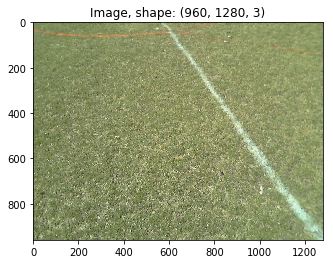

In [95]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
image_bgr= cv2.imread("./data/playground.jpg")

# converting to grayscale and also to rgb
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

image_gray= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# plotting the image
plt.title("Image, shape: {}".format(image_rgb.shape))
plt.imshow(image_rgb)
plt.show()

In [96]:
# Edge detection

#first lets perform gaussion blur to extract the edges
blured_img= cv2.GaussianBlur(src= image_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)
ret, thresh= cv2.threshold(src= blured_img, thresh= 180, maxval= 255, type= cv2.THRESH_BINARY)

# erode operation to remove blobs
kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (5,5))
close= cv2.morphologyEx(src= thresh, op= cv2.MORPH_CLOSE, kernel= kernel, iterations= 2)


lines_houghProb= cv2.HoughLinesP(image= close, rho= 1, theta= np.pi/180, threshold= 100, minLineLength= 30, maxLineGap= 2)

result_image= image_rgb.copy()

for x in range(0, len(lines_houghProb)):
    for x1,y1,x2,y2 in lines_houghProb[x]:
        cv2.line(result_image,(x1,y1),(x2,y2),(0,0,255),1)

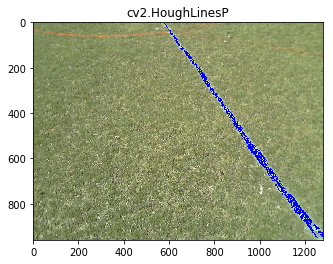

In [97]:
plt.title("cv2.HoughLinesP")
plt.imshow(result_image)
plt.show()

By comparing with HoughLines, HoughLinesP (probabilistic houghlines) which is similar to the working of houghlines with some additional functionality gives more proper result by detecting the lines in the image.

#### HoughCircles:

Finds circles in a grayscale image using the Hough transform.

The function finds circles in a grayscale image using a modification of the Hough transform.
Function accepts single channel as input.

Parameters:     

**method**: Defines the method to detect circles in images. Currently, the only implemented method is cv2.HOUGH_GRADIENT, which corresponds to the Yuen et al. paper.                           
**dp**: This parameter is the inverse ratio of the accumulator resolution to the image resolution (see Yuen et al. for more details). Essentially, the larger the dp gets, the smaller the accumulator array gets.                      
**minDist**: Minimum distance between the center (x, y) coordinates of detected circles. If the minDist is too small, multiple circles in the same neighborhood as the original may be (falsely) detected. If the minDist is too large, then some circles may not be detected at all.                        

Link: https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

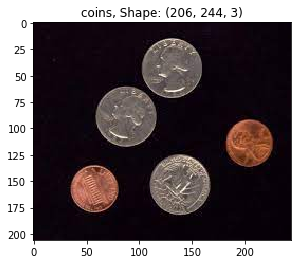

In [2]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
# reading an image
coin_img_bgr= cv2.imread("./data/coin.jpg")

# convertin to graysvale and rgb
coins_rgb= cv2.cvtColor(coin_img_bgr, cv2.COLOR_BGR2RGB)
coins_gray= cv2.cvtColor(coin_img_bgr, cv2.COLOR_BGR2GRAY)

# plotting th image
plt.title("coins, Shape: {}".format(coins_rgb.shape))
plt.imshow(coins_rgb)
plt.show()

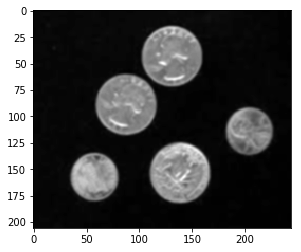

In [3]:
# blurring the image
blur_img= cv2.GaussianBlur(src= coins_gray, ksize= (5,5), sigmaX= 0, sigmaY= 0)
plt.imshow(blur_img,cmap="gray")

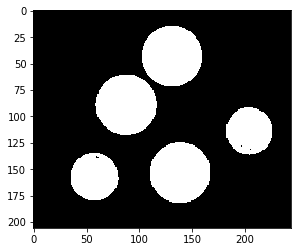

In [4]:
ret, thresh_img= cv2.threshold(src= blur_img, thresh= 100, maxval= 200, type= cv2.THRESH_OTSU)

#thresh_img= cv2.bitwise_not(thresh_img)
plt.imshow(thresh_img,cmap="gray")

In [5]:
# hough circles
circles= cv2.HoughCircles(image= thresh_img, method= cv2.HOUGH_GRADIENT , dp= 5, minDist= 50)

In [6]:
circles

array([[[132.5,  42.5,  28.5],
        [137.5, 152.5,  28. ],
        [ 87.5,  87.5,  28. ],
        [ 57.5, 157.5,  21.5],
        [202.5, 112.5,  22.5]]], dtype=float32)

In [7]:
output= coins_rgb.copy()

circles = np.round(circles[0, :]).astype("int")
# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle
    #corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 2)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), 3)
  

There are 5 coins present in image


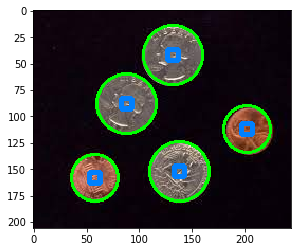

In [8]:
print("There are {} coins present in image".format(len(circles)))
plt.imshow(output)
plt.show()

The parameters dp and minDist are important to define the circles from the function. optimal values of these two parameters leads to give a better result